In [1099]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [1016]:
path = "/Users/jossyg/Desktop/DS Project/OSMI 2019 Mental Health in Tech Survey Results - OSMI Mental Health in Tech Survey 2019.csv"

In [1017]:

df = pd.read_csv(path)

In [1018]:
df.head()

,*Are you self-employed?*,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided health coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health disorders and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, how easy or difficult would it be to ask for that leave?",...,Briefly describe what you think the industry as a whole and/or employers could do to improve mental health support for employees.,"If there is anything else you would like to tell us that has not been covered by the survey questions, please use this space to do so.",Would you be willing to talk to one of us more extensively about your experiences with mental health issues in the tech industry? (Note that all interview responses would be used _anonymously_ and only with your permission.),What is your age?,What is your gender?,What country do you *live* in?,What US state or territory do you *live* in?,What is your race?,What country do you *work* in?,What US state or territory do you *work* in?
0,False,26-100,True,True,I don't know,No,Yes,Yes,I don't know,Very easy,...,NaN,NaN,False,25,Male,United States of America,Nebraska,White,United States of America,Nebraska
1,False,26-100,True,True,Yes,No,No,Yes,Yes,I don't know,...,NaN,NaN,False,51,male,United States of America,Nebraska,White,United States of America,Nebraska
2,False,26-100,True,True,I don't know,No,No,I don't know,I don't know,Somewhat difficult,...,I think opening up more conversation around th...,Thank you,True,27,Male,United States of America,Illinois,White,United States of America,Illinois
3,False,100-500,True,True,I don't know,No,Yes,Yes,Yes,Very easy,...,NaN,NaN,False,37,male,United States of America,Nebraska,White,United States of America,Nebraska
4,False,26-100,True,True,I don't know,No,I don't know,I don't know,I don't know,I don't know,...,NaN,NaN,False,46,m,United States of America,Nebraska,White,United States of America,Nebraska


In [1092]:
len(df)

352

In [1091]:
len(df.columns)

82

<span style='background: yellow; font-size: 20px;' >Selecting columns I want to analyze, because there are too many columns.</span> 

In [1019]:
new_df = df[['Does your employer provide mental health benefits as part of healthcare coverage?',
'Do you know the options for mental health care available under your employer-provided health coverage?',
'Would you feel more comfortable talking to your coworkers about your physical health or your mental health?', 
'If a mental health issue prompted you to request a medical leave from work, how easy or difficult would it be to ask for that leave?',
'Would you feel comfortable discussing a mental health issue with your direct supervisor(s)?',
'Have you ever discussed your mental health with your employer?',
'Would you feel comfortable discussing a mental health issue with your coworkers?',
'Have you ever discussed your mental health with coworkers?',
'Overall, how much importance does your employer place on physical health?',
'Overall, how much importance does your employer place on mental health?',
'Do you have medical coverage (private insurance or state-provided) that includes treatment of mental health disorders?',
'Do you know local or online resources to seek help for a mental health issue?',
'Do you *currently* have a mental health disorder?',
'Have you ever been *diagnosed* with a mental health disorder?',
'Have your observations of how another individual who discussed a mental health issue made you less likely to reveal a mental health issue yourself in your current workplace?',
'What is your gender?',
'What is your age?',
'What is your race?',
'What country do you *live* in?',
'What country do you *work* in?']].copy()






In [1020]:
new_df

,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided health coverage?,Would you feel more comfortable talking to your coworkers about your physical health or your mental health?,"If a mental health issue prompted you to request a medical leave from work, how easy or difficult would it be to ask for that leave?",Would you feel comfortable discussing a mental health issue with your direct supervisor(s)?,Have you ever discussed your mental health with your employer?,Would you feel comfortable discussing a mental health issue with your coworkers?,Have you ever discussed your mental health with coworkers?,"Overall, how much importance does your employer place on physical health?","Overall, how much importance does your employer place on mental health?",Do you have medical coverage (private insurance or state-provided) that includes treatment of mental health disorders?,Do you know local or online resources to seek help for a mental health issue?,Do you *currently* have a mental health disorder?,Have you ever been *diagnosed* with a mental health disorder?,Have your observations of how another individual who discussed a mental health issue made you less likely to reveal a mental health issue yourself in your current workplace?,What is your gender?,What is your age?,What is your race?,What country do you *live* in?,What country do you *work* in?
0,I don't know,No,Physical health,Very easy,Yes,False,Yes,True,5.0,5.0,NaN,NaN,Don't Know,NaN,No,Male,25,White,United States of America,United States of America
1,Yes,No,Physical health,I don't know,Maybe,False,Maybe,True,5.0,7.0,NaN,NaN,Possibly,NaN,No,male,51,White,United States of America,United States of America
2,I don't know,No,Same level of comfort for each,Somewhat difficult,No,False,Maybe,True,5.0,4.0,NaN,NaN,No,NaN,No,Male,27,White,United States of America,United States of America
3,I don't know,No,Physical health,Very easy,Yes,False,Maybe,False,1.0,3.0,NaN,NaN,No,NaN,No,male,37,White,United States of America,United States of America
4,I don't know,No,Physical health,I don't know,No,False,No,False,4.0,4.0,NaN,NaN,No,NaN,NaN,m,46,White,United States of America,United States of America
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347,I don't know,No,Physical health,Somewhat difficult,No,False,No,False,5.0,5.0,NaN,NaN,Possibly,NaN,Maybe,male,27,NaN,India,India
348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,"No, I don't know any",No,NaN,NaN,m,48,White,United States of America,United States of America
349,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,"No, I don't know any",No,NaN,NaN,M,50,NaN,India,India
350,No,No,Physical health,Difficult,No,False,Maybe,False,9.0,3.0,NaN,NaN,Possibly,NaN,Yes,female,30,NaN,India,India


<span style='background: yellow; font-size: 20px;' >Renaming Columns so that it is easier to call on</span> 

In [1022]:
mapping = {new_df.columns[0]: 'MH_Benefits', new_df.columns[1]: 'MH_Options',new_df.columns[2]: 'MH_vs_PH_Coworkers', 
        new_df.columns[3]: 'Difficulty_MH_Leave', new_df.columns[4]: 'MH_Comfort_DS', new_df.columns[5]: 'MH_Discussion_Employer', 
        new_df.columns[6]: 'MH_Comfort_Coworkers', new_df.columns[7]: 'MH_Discussion_Coworkers', new_df.columns[8]: 'PH_Importance_Employer', 
        new_df.columns[9]: 'MH_Importance_Employer', new_df.columns[10]: 'Coverage_MH', new_df.columns[11]: 'Resources_MH', 
        new_df.columns[12]: 'Current_MH', new_df.columns[13]: 'MH_Diagnosis', new_df.columns[14]: 'Observations_Change', 
        new_df.columns[15]: 'Gender', new_df.columns[16]: 'Age', new_df.columns[17]: 'Race', new_df.columns[18]: 'Country_Of_Residence', 
        new_df.columns[19]: 'Country_Of_Work'}
ren = new_df.rename(columns= mapping, inplace= True)
ren

<span style='background: yellow; font-size: 20px;' >Finding the percentage of values missing for each column</span> 

In [1023]:
percent_missing = new_df.isnull().sum() * 100 / len(new_df)
missing_value_df = pd.DataFrame({'column_name': new_df.columns,
                                 'percent_missing': percent_missing})

percent_missing

MH_Benefits                13.636364
MH_Options                 21.022727
MH_vs_PH_Coworkers         13.636364
Difficulty_MH_Leave        13.636364
MH_Comfort_DS              13.636364
MH_Discussion_Employer     13.636364
MH_Comfort_Coworkers       13.636364
MH_Discussion_Coworkers    14.488636
PH_Importance_Employer     13.636364
MH_Importance_Employer     13.636364
Coverage_MH                86.363636
Resources_MH               86.363636
Current_MH                  0.000000
MH_Diagnosis               58.238636
Observations_Change        19.886364
Gender                      1.420455
Age                         0.000000
Race                       42.045455
Country_Of_Residence        0.000000
Country_Of_Work             0.000000
dtype: float64

<span style='background: yellow; font-size: 20px;' >Finding the different ways the different gender are spelled as, and Correcting them.</span>

If not female or male, separate as other.

In [1024]:
new_df['Gender'].unique()

array(['Male', 'male', 'm', 'female', 'Female', nan, 'M', 'F', 'f',
       'Let\'s keep it simple and say "male"', 'Non-binary',
       'Identify as male', 'Male ', 'Woman', 'Non binary', 'Masculine',
       'Cishet male', 'None', 'Female-identified', 'woman', 'Nonbinary',
       'agender', 'Man', 'Questioning', 'cis male', 'Cis Male',
       'I have a penis', 'rr', 'cis woman', 'Agender trans woman',
       'Female ', 'femmina', '43', 'Trans man', 'man', 'masculino',
       'I am a Wookie', 'Make', 'Trans non-binary/genderfluid',
       'CIS Male', 'Non-binary and gender fluid', 'Femile',
       'Female (cis)'], dtype=object)

In [1025]:
female = {'f', 'F', 'female', 'Female ', 'Woman', 'W', 'woman', 'femile', 'femmina', 'femile', 'Femile', 'cis woman', 'Female-identified', 'Female (cis)'}
male = {'m', 'M', 'male', 'Male ', 'Man', 'M ', 'man', 'Masculine', 'Masculino', 'masculino', 'Cis Male', "CIS Male", "Cishet male", 'Identify as male'}

new_df["Gender"] = new_df["Gender"].replace(male, "Male")
new_df["Gender"] = new_df["Gender"].replace(female, "Female")
new_df.loc[(new_df['Gender'] != 'Female') & (new_df["Gender"] != "Male"), 'Gender'] = 'Other'

In [1026]:
new_df['Gender'].unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [1109]:
new_df['Gender'].value_counts()

Male      227
Female    100
Other      25
Name: Gender, dtype: int64

In [1027]:
new_df

,MH_Benefits,MH_Options,MH_vs_PH_Coworkers,Difficulty_MH_Leave,MH_Comfort_DS,MH_Discussion_Employer,MH_Comfort_Coworkers,MH_Discussion_Coworkers,PH_Importance_Employer,MH_Importance_Employer,Coverage_MH,Resources_MH,Current_MH,MH_Diagnosis,Observations_Change,Gender,Age,Race,Country_Of_Residence,Country_Of_Work
0,I don't know,No,Physical health,Very easy,Yes,False,Yes,True,5.0,5.0,NaN,NaN,Don't Know,NaN,No,Male,25,White,United States of America,United States of America
1,Yes,No,Physical health,I don't know,Maybe,False,Maybe,True,5.0,7.0,NaN,NaN,Possibly,NaN,No,Male,51,White,United States of America,United States of America
2,I don't know,No,Same level of comfort for each,Somewhat difficult,No,False,Maybe,True,5.0,4.0,NaN,NaN,No,NaN,No,Male,27,White,United States of America,United States of America
3,I don't know,No,Physical health,Very easy,Yes,False,Maybe,False,1.0,3.0,NaN,NaN,No,NaN,No,Male,37,White,United States of America,United States of America
4,I don't know,No,Physical health,I don't know,No,False,No,False,4.0,4.0,NaN,NaN,No,NaN,NaN,Male,46,White,United States of America,United States of America
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347,I don't know,No,Physical health,Somewhat difficult,No,False,No,False,5.0,5.0,NaN,NaN,Possibly,NaN,Maybe,Male,27,NaN,India,India
348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,"No, I don't know any",No,NaN,NaN,Male,48,White,United States of America,United States of America
349,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,"No, I don't know any",No,NaN,NaN,Male,50,NaN,India,India
350,No,No,Physical health,Difficult,No,False,Maybe,False,9.0,3.0,NaN,NaN,Possibly,NaN,Yes,Female,30,NaN,India,India


<span style='background: yellow; font-size: 20px;' >Percentage of Answers based on Gender</span>

Text(0, 0.5, '')

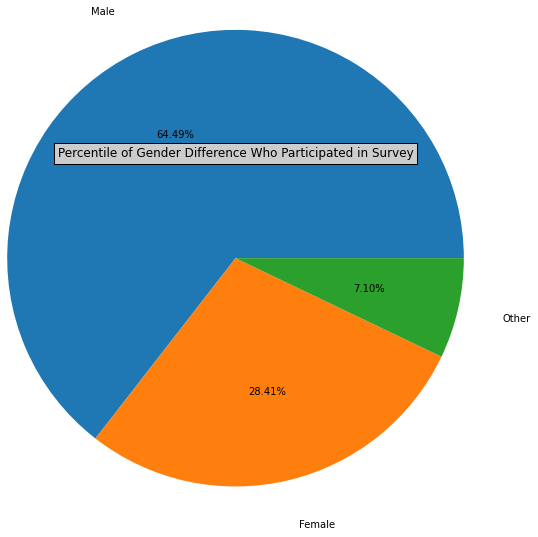

In [1110]:
# Create Chart 
new_df["Gender"].value_counts().plot(kind = 'pie', figsize= (3.5, 3.5), radius = 3, labeldistance = 1.2, autopct='%1.2f%%' )
plt.title("Percentile of Gender Difference Who Participated in Survey", loc = 'center', bbox = {'facecolor': '0.8'})
plt.ylabel(None)
# Create legend based on list created before 

<span style='background: yellow; font-size: 20px;' >OneHotEncoding for Conversations Comfort with Coworkers- Mental Health vs. Physical Health</span> 


In [1028]:
# Find the unique values in column
new_df["MH_vs_PH_Coworkers"].unique()

array(['Physical health', 'Same level of comfort for each', nan,
       'Mental health'], dtype=object)

In [1030]:
# Assign column to variable so that it is easier to call on 
comfort= new_df["MH_vs_PH_Coworkers"]

In [1031]:
# Find the number of missing values in column
new_df["MH_vs_PH_Coworkers"].isnull().sum()

48

In [1032]:
# Fill in missing values in column with "None"
comfort.fillna("None", inplace= True)

In [1034]:
# OneHotEncode column 
pd.get_dummies(new_df["MH_vs_PH_Coworkers"])

,Mental health,None,Physical health,Same level of comfort for each
0,0,0,1,0
1,0,0,1,0
2,0,0,0,1
3,0,0,1,0
4,0,0,1,0
...,...,...,...,...
347,0,0,1,0
348,0,1,0,0
349,0,1,0,0
350,0,0,1,0


In [1035]:
# assign new df to a variable to call on later
one_change = pd.get_dummies(new_df["MH_vs_PH_Coworkers"])

In [1036]:
# Concatinate original dataframe with new OneHotEncoded dataframe
new_df = pd.concat([new_df, one_change], axis = 1)

In [1037]:
# Drop original column that we OneHotEncoded
new_df.drop('MH_vs_PH_Coworkers', axis=1, inplace=True)

In [1038]:
new_df

,MH_Benefits,MH_Options,Difficulty_MH_Leave,MH_Comfort_DS,MH_Discussion_Employer,MH_Comfort_Coworkers,MH_Discussion_Coworkers,PH_Importance_Employer,MH_Importance_Employer,Coverage_MH,...,Observations_Change,Gender,Age,Race,Country_Of_Residence,Country_Of_Work,Mental health,None,Physical health,Same level of comfort for each
0,I don't know,No,Very easy,Yes,False,Yes,True,5.0,5.0,NaN,...,No,Male,25,White,United States of America,United States of America,0,0,1,0
1,Yes,No,I don't know,Maybe,False,Maybe,True,5.0,7.0,NaN,...,No,Male,51,White,United States of America,United States of America,0,0,1,0
2,I don't know,No,Somewhat difficult,No,False,Maybe,True,5.0,4.0,NaN,...,No,Male,27,White,United States of America,United States of America,0,0,0,1
3,I don't know,No,Very easy,Yes,False,Maybe,False,1.0,3.0,NaN,...,No,Male,37,White,United States of America,United States of America,0,0,1,0
4,I don't know,No,I don't know,No,False,No,False,4.0,4.0,NaN,...,NaN,Male,46,White,United States of America,United States of America,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347,I don't know,No,Somewhat difficult,No,False,No,False,5.0,5.0,NaN,...,Maybe,Male,27,NaN,India,India,0,0,1,0
348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,...,NaN,Male,48,White,United States of America,United States of America,0,1,0,0
349,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,...,NaN,Male,50,NaN,India,India,0,1,0,0
350,No,No,Difficult,No,False,Maybe,False,9.0,3.0,NaN,...,Yes,Female,30,NaN,India,India,0,0,1,0


<span style='background: yellow; font-size: 20px;' >Visualizing the difference in comfort talking to a direct supervisor about mental health based on gender</span> 

In [1039]:
new_df['MH_Comfort_DS'].unique()

array(['Yes', 'Maybe', 'No', nan], dtype=object)

In [1040]:
# Fill null values with "Not Sure"
new_df['MH_Comfort_DS'].fillna("Not Sure", inplace= True)

In [1041]:
new_df['MH_Comfort_DS'].unique()

array(['Yes', 'Maybe', 'No', 'Not Sure'], dtype=object)

In [1042]:
# Replace values to make more sense when graphing
new_df['MH_Comfort_DS'] = new_df['MH_Comfort_DS'].replace({'Yes': 'Comfortable', 'No': 'Not Comfortable', 'Maybe': 'Semi-Comfortable'})

In [1043]:
gender = new_df["Gender"]

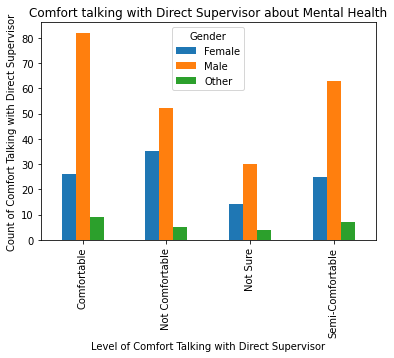

In [1044]:
new_df.groupby(["MH_Comfort_DS", gender]).size().unstack(level = 1).plot(kind = 'bar')
plt.xlabel("Level of Comfort Talking with Direct Supervisor")
plt.ylabel("Count of Comfort Talking with Direct Supervisor")
plt.title("Comfort talking with Direct Supervisor about Mental Health")
plt.show()

<span style='background: yellow; font-size: 20px;' >Visualizing the difference in comfort talking about mental health with either Supervisor or Coworkers</span> 

In [1045]:
new_df['MH_Comfort_Coworkers'].unique()

array(['Yes', 'Maybe', 'No', nan], dtype=object)

In [1046]:
new_df['MH_Comfort_Coworkers'].fillna("Not Sure", inplace= True)

In [1047]:
count_DS = new_df['MH_Comfort_DS'].value_counts()

In [1048]:
count_coworker = new_df['MH_Comfort_Coworkers'].value_counts()

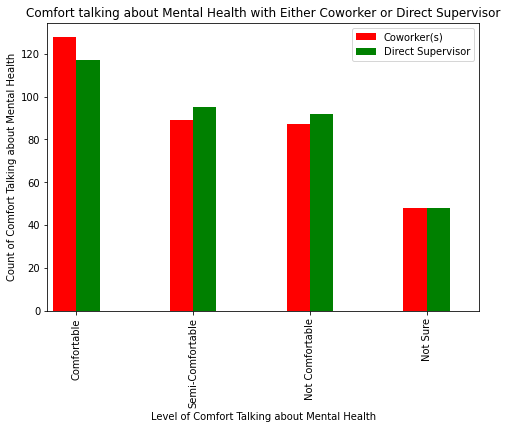

In [1049]:
fig = plt.figure()
ax = fig.add_axes([0 ,0 ,1, 1])
width = 0.2
count_coworker.plot(kind='bar',label = 'Coworker(s)', color='red',ax = ax, width=width,position=1)
count_DS.plot(kind='bar',label = 'Direct Supervisor', color='green' ,ax = ax, width=width, position=0)
ax.legend()
plt.xlabel("Level of Comfort Talking about Mental Health")
plt.ylabel("Count of Comfort Talking about Mental Health")
plt.title("Comfort talking about Mental Health with Either Coworker or Direct Supervisor")
plt.show()

<span style='background: yellow; font-size: 20px;' >Employer Difference in Importance between Mental Health and Physical Health based on Employees answers</span> 

In [1050]:
new_df['PH_Importance_Employer'].unique()

array([ 5.,  1.,  4.,  6., nan,  8.,  7., 10.,  9.,  3.,  0.,  2.])

In [1086]:
# Drop Null values and assign only Unique values to Variable
PH_importance = new_df['PH_Importance_Employer'].dropna().unique()
MH_importance = new_df['MH_Importance_Employer'].dropna().unique()

In [1053]:
# Count amount of values
PH_importance_C = new_df['PH_Importance_Employer'].value_counts()
MH_importance_C = new_df['MH_Importance_Employer'].value_counts()

Text(0.5, 1.0, 'Level of Importance to Employer to Talk About Physical Health vs. Mental Health')

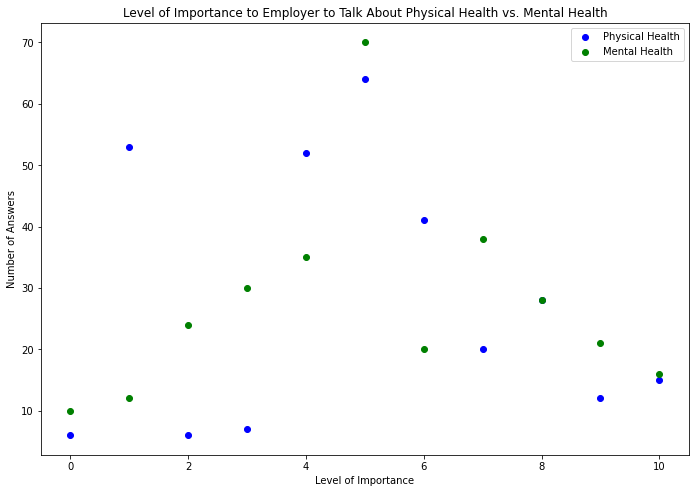

In [1116]:
# Create Scatter Plot 
fig_1 = plt.figure()
ax_1 = fig_1.add_axes([0 ,0 ,1.5, 1.5])
#size_1 = PH_importance_C * 6
#size_2 = MH_importance_C *6
plt.scatter(PH_importance, PH_importance_C, c = 'blue', label = 'Physical Health')
plt.scatter(MH_importance, MH_importance_C, c = 'green', label = 'Mental Health')
plt.legend()
plt.xlabel("Level of Importance")
plt.ylabel("Number of Answers")
plt.title("Level of Importance to Employer to Talk About Physical Health vs. Mental Health")

<span style='background: yellow; font-size: 20px;' >Analyzing Percentage of Answers based on Country</span> 

In [1055]:
new_df["Country_Of_Work"].value_counts().sum()

352

In [1056]:
# making the names of all countries of work to a list in order to call on it later to make the legend 
names = new_df["Country_Of_Work"].value_counts().index.to_list()

In [1057]:
# Findind the percentage of answer of each country adn rounding it to two decimal points to use later to make legend
percentage = (new_df["Country_Of_Work"].value_counts()* 100)/ (new_df["Country_Of_Work"].value_counts().sum())
percentage =  round(percentage, 2)
# Fixing formating for each tuple to show the percentage sign and making it into a list
labels = [f'{l,n}%' for l, n in zip(names, percentage)]

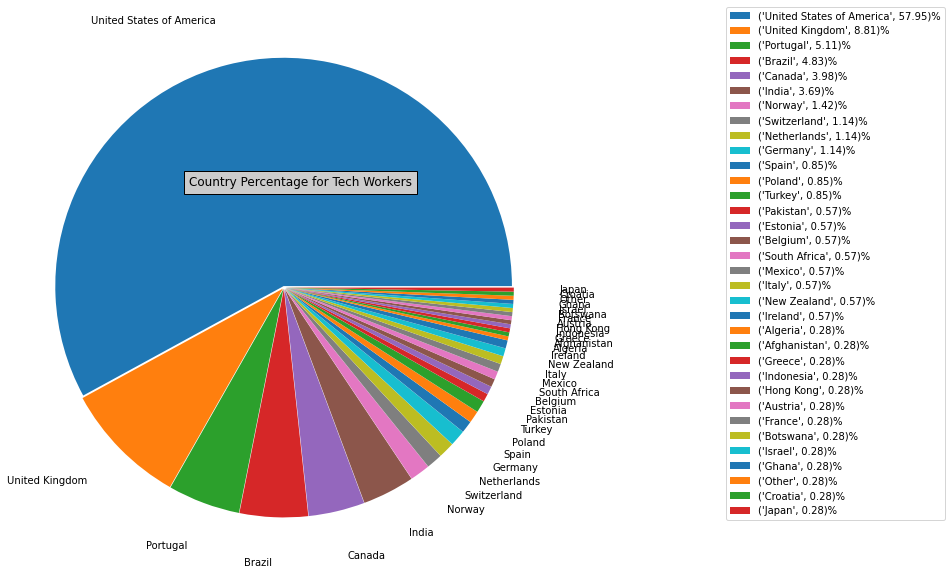

In [1058]:
# Create Chart 
chart_explode = [0.02] * len(new_df['Country_Of_Work'].value_counts())
new_df["Country_Of_Work"].value_counts().plot(kind = 'pie', figsize= (3.5, 3.5), radius = 3, explode = chart_explode, labeldistance = 1.2,  )
plt.title("Country Percentage for Tech Workers", loc = 'left', bbox = {'facecolor': '0.8', 'pad': 5})
plt.ylabel(None)
# Create legend based on list created before 
plt.legend(labels, bbox_to_anchor = (4, 2))

<span style='background: yellow; font-size: 20px;' >Comfort Asking for Mental Health Leave based on Country of Work</span> 

In [1059]:
new_df['Difficulty_MH_Leave'].unique()

array(['Very easy', "I don't know", 'Somewhat difficult', 'Somewhat easy',
       nan, 'Neither easy nor difficult', 'Difficult'], dtype=object)

In [1060]:
new_df['Difficulty_MH_Leave'].isnull().sum()

48

In [1061]:
mh_leave= new_df['Difficulty_MH_Leave'].dropna()

In [1065]:
new_df['Difficulty_MH_Leave'].value_counts()

Somewhat easy                 83
Very easy                     70
I don't know                  52
Somewhat difficult            49
Neither easy nor difficult    31
Difficult                     19
Name: Difficulty_MH_Leave, dtype: int64

In [1081]:
mh_d= new_df.loc[(new_df['Difficulty_MH_Leave'] == "Very easy") | (new_df['Difficulty_MH_Leave'] == "Difficult")]
mh_leave = mh_d.Difficulty_MH_Leave
mh_leave

0      Very easy
3      Very easy
8      Very easy
10     Very easy
18     Very easy
         ...    
334    Very easy
337    Very easy
345    Very easy
346    Very easy
350    Difficult
Name: Difficulty_MH_Leave, Length: 89, dtype: object

In [1082]:
mh_leave_c = mh_d.Country_Of_Work
mh_leave_c

0      United States of America
3      United States of America
8                United Kingdom
10               United Kingdom
18     United States of America
                 ...           
334    United States of America
337    United States of America
345                      Brazil
346    United States of America
350                       India
Name: Country_Of_Work, Length: 89, dtype: object

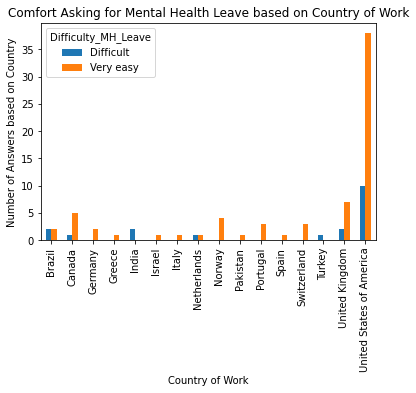

In [1084]:
new_df.groupby([mh_leave_c, mh_leave]).size().unstack(level = 1).plot(kind = 'bar')
plt.xlabel("Country of Work")
plt.ylabel("Number of Answers based on Country")
plt.title("Comfort Asking for Mental Health Leave based on Country of Work")
plt.show()

<span style='background: yellow; font-size: 20px;' >Comfort Asking for Mental Health Leave by Gender</span> 

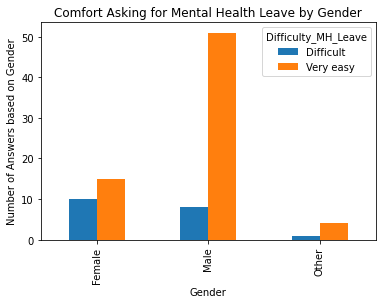

In [1114]:
new_df.groupby([gender, mh_leave]).size().unstack(level = 1).plot(kind = 'bar')
plt.xlabel("Gender")
plt.ylabel("Number of Answers based on Gender")
plt.title("Comfort Asking for Mental Health Leave by Gender")
plt.show()